## #  Quantitative Statistical Ecology Programs in Africa
This notebook is to obtain a comprehensive list of African universities form two different sources of data:
    _local csv file containing university information, which includes details such as university name, country, longitude and latitude.
    _universities library, which provides programmatic access to a vast collection of university information.
By combining data from these sources, the notebook aims to create a more complete and accurate list of African universities.

The resulting dataset can be used for various purposes, such as research, analysis, or generating insights into higher education across the African continent.

In [16]:
import pandas as pd
import warnings

# Suppress FutureWarning and UserWarning messages
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Transform the data into a DataFrame.
program_df = pd.read_parquet('qantitative_statistical_ecology_programs.parquet')
    

program_df

,University,Program,Country
0,Stellenbosch University,MSc in Quantitative Ecology,South Africa
1,University of Cape Town,MSc in Statistical Ecology and Environmental M...,South Africa
2,University of KwaZulu-Natal,MSc in Applied Statistics (Ecology and Environ...,South Africa
3,University of Cape Town,MSc in Statistical Sciences (Ecology and Envir...,South Africa
4,Rhodes University,MSc in Ecology and Statistics,South Africa
5,University of the Witwatersrand,MSc in Statistics and Environmental Science,South Africa
6,University of Nairobi,MSc in Environmental Statistics,Kenya
7,Makerere University,MSc in Environmental Statistics,Uganda
8,University of Ghana,MSc in Statistics (Ecology and Environmental S...,Ghana
9,University of Ibadan,MSc in Statistical Ecology,Nigeria


In [11]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

def add_coordinates(df, uni_address_column, coun_address_column):
    geolocator = Nominatim(user_agent="university-locator")
    df['Latitude'] = None
    df['Longitude'] = None

    def geocode_with_timeout(address):
        try:
            location = geolocator.geocode(address)
            return location
        except GeocoderTimedOut:
            return geocode_with_timeout(address)
        except Exception as e:
            # print(f"Geocoding error for address '{address}': {str(e)}")
            return None

    for index, row in df.iterrows():
        uni_address = row[uni_address_column]
        coun_address = row[coun_address_column]
        location = geocode_with_timeout(uni_address)

        if location is None:
            location = geocode_with_timeout(coun_address)

        if location:
            df.at[index, 'latitude'] = location.latitude
            df.at[index, 'longitude'] = location.longitude

    return df

try:
    df_with_coordinates = pd.read_parquet('df_with_coordinates.parquet')
except FileNotFoundError:
    df_with_coordinates = add_coordinates(df_africa, 'Name', 'Country')

    df_with_coordinates.to_parquet('df_with_coordinates.parquet')

 

df_with_coordinates = df_with_coordinates.drop("Country", axis=1)
df_with_coordinates

,Name,Country (English),Continent,Latitude,Longitude
0,Université Amar Telidji,Algeria,Africa,33.799997,2.852186
1,Université M'hamed Bouguerra de Boumerdes,Algeria,Africa,28.000027,2.999983
2,Université Mentouri Constantine,Algeria,Africa,36.339137,6.622462
3,Université Mouloud Mammeri de Tizi Ouzou,Algeria,Africa,36.697899,4.057747
4,Université d'Alger 3,Algeria,Africa,36.757128,2.984307
...,...,...,...,...,...
615,Clark Atlanta University,Gabon,Africa,33.750125,-84.411589
616,Morehouse,Gabon,Africa,32.832696,-91.837413
617,Deraya University,Egypt,Africa,24.768802,46.590220
618,North-West Univeristy,South Africa,Africa,13.149154,123.753557


In [12]:
from pandas import pandas
from data_all import universities, universities_details
 
all_pro = pandas.DataFrame(universities_details)
all_pro = all_pro.rename(columns={'country': 'Country', 'name': 'University', 'longitude': 'longitude', 'latitude': 'latitude'})

# Concatenate the two DataFrames along columns
result = program_df.merge(all_pro, on=["University", "Country"], how="inner")
result = result.drop_duplicates(subset=["University", "Program"], keep="first")
result = result.reset_index(drop=True)
result = result.dropna()
result.loc[result['University'] == 'Stellenbosch University', ['longitude', 'latitude']] = [18.8679, -33.9321]
result.loc[result['University'] == 'University of Cape Town', ['longitude', 'latitude']] = [18.4719, -33.9628]
result

,University,Country,longitude,latitude
0,University of Cape Town,South Africa,-18.4719,-33.9628
1,Stellenbosch University,South Africa,-18.8679,-33.9321


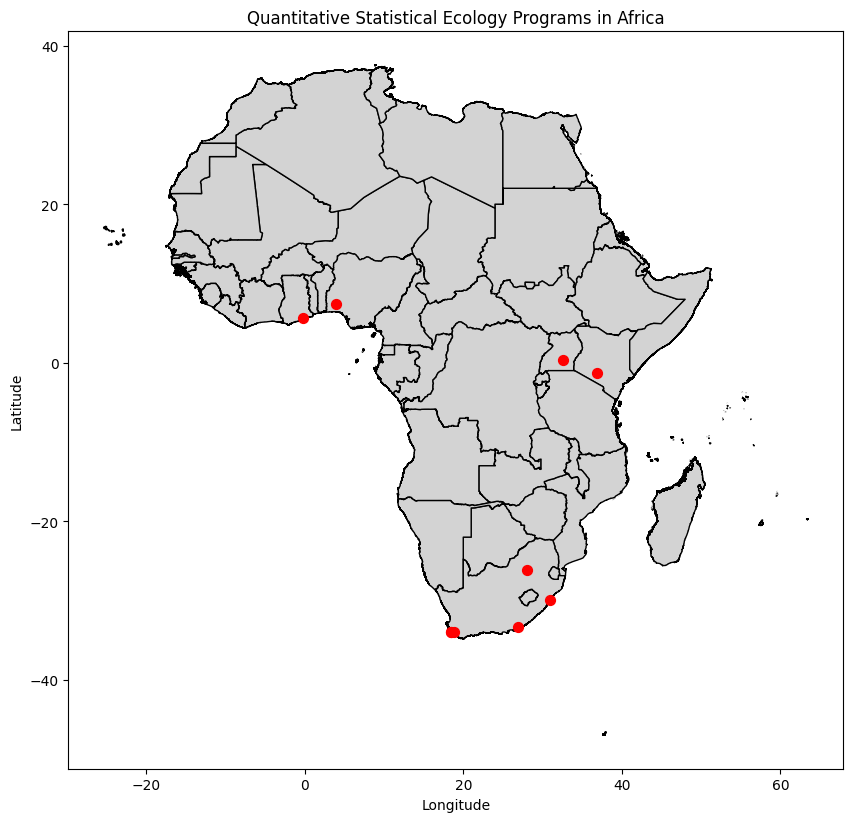

In [14]:
import geopandas as gpd
import matplotlib.pyplot as plt
from scripts import map_plot
import os

# Get the current directory (path) of the notebook
notebook_path = os.getcwd()

# Specify the name of the child directory or file
child_name = "afr_g2014_2013_0/afr_g2014_2013_0.shp"  # Replace with the desired child directory or file name

# Construct the path to the child directory or file
child_path = os.path.join(notebook_path, child_name)
 
 
africa_shapefile = child_path # Replace with the actual file path

map_plot(africa_shapefile,result)